<a href="https://colab.research.google.com/github/Imran1910276131/AI_Assignment4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import glob
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import vgg16
from tensorflow.keras.utils import to_categorical

In [17]:
original_model = vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)
#original_model.summary()

58889256/58889256 [==============================] - 1s 0us/step


In [2]:
def create_model():

    inputs = layers.Input(shape=(224, 224, 3))

    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)


    # custom part
    x = layers.Flatten()(x)
    x = layers.Dense(4096)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(4096)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(2048)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(2048)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(1024)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(1024)(x)

    outputs = layers.Dense(2, activation="softmax")(x)

    custom_vgg16 = Model(inputs, outputs)

    return custom_vgg16

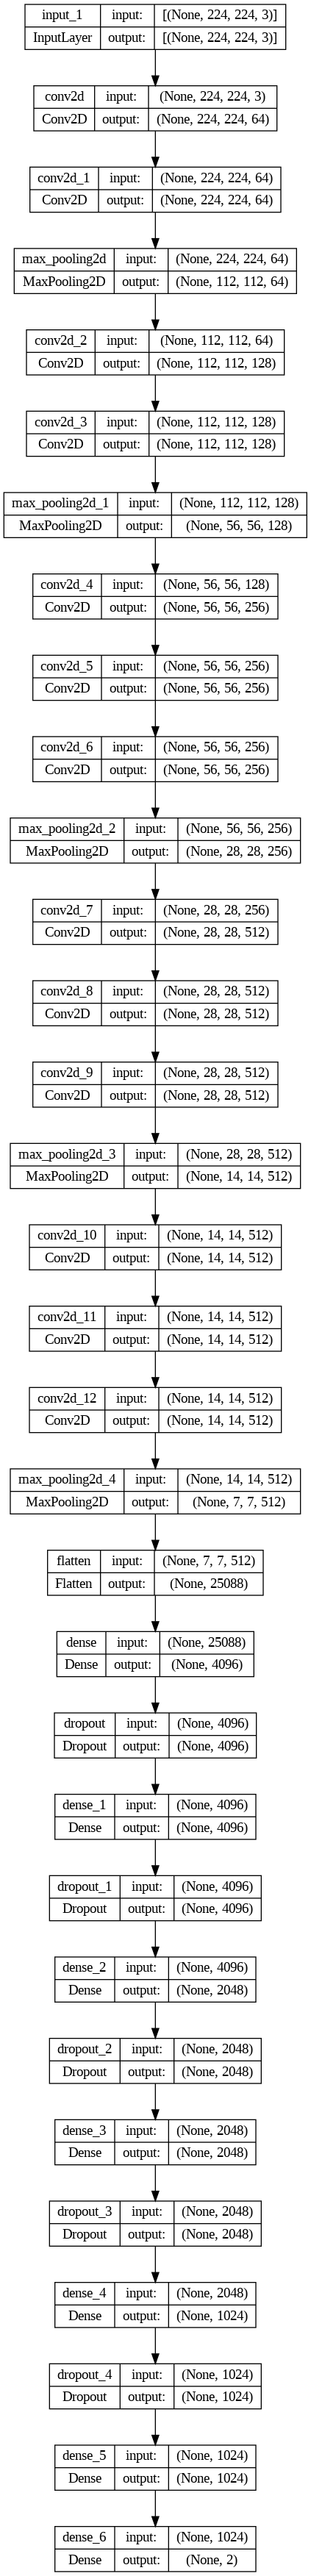

In [3]:
custom_model = create_model()
#custom_model.summary()
tf.keras.utils.plot_model(custom_model, show_shapes=True)


In [20]:
for i in range(len(original_model.layers)-3):
  custom_model.layers[i].set_weights(original_model.layers[i].get_weights())

In [21]:
for i in range(len(original_model.layers)-3):
  custom_model.layers[i].trainable = False

# Our Personal Dataset

In [26]:
import random
data_path = '/content/drive/MyDrive/Data Set'
image_paths  = glob.glob(data_path + '/All Data/*')

random.shuffle(image_paths)

image_list = []
class_list = []

for i in tqdm(range(len(image_paths))):
  image = cv2.imread(image_paths[i])
  image = cv2.resize(image, (224, 224))
  image_list.append(image)
  class_list.append(np.array(int(image_paths[i][-5])-1))

100%|██████████| 871/871 [05:09<00:00,  2.82it/s]


<ipython-input-28-3684e25d5ebe>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


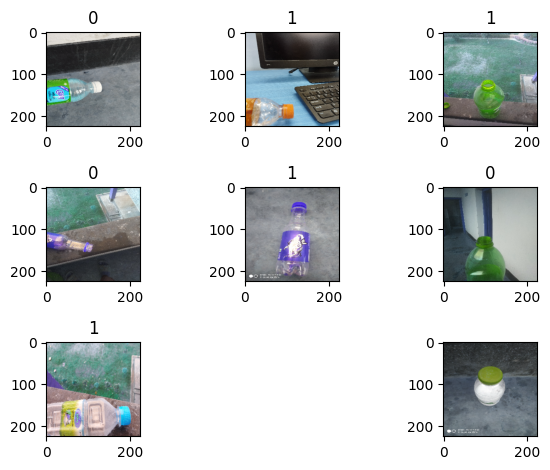

<Figure size 640x480 with 0 Axes>

In [28]:


for i in range(9):
    # plt.figure(figsize=(10,5))
    plt.title(str(class_list[i+550]))
    plt.subplot(3, 3, i+1)
    plt.imshow(image_list[i+550])
    plt.tight_layout()
plt.show()
plt.savefig("/content/drive/MyDrive/Data Set/output.jpg")

In [9]:
class_list[540]

array(1)

In [7]:
image_data = np.array(image_list)
class_data = np.array(class_list)

train_x, test_x = image_data[:800], image_data[800:]
train_y, test_y = class_data[:800], class_data[800:]

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)

In [8]:
model_path = '/content/drive/MyDrive/Data Set/Saved Model/Transfer Learning'
my_callback = [keras.callbacks.ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only = True),
               keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)]

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
custom_model.compile(optimizer = opt, loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='acc')])
history = custom_model.fit(train_x, train_y, batch_size = 32, epochs = 100, validation_split = 0.1, shuffle = True, callbacks = my_callback)

Epoch 1/100
23/23 [==============================] - 21s 370ms/step - loss: 180.1494 - acc: 0.5778 - val_loss: 7.2459 - val_acc: 0.6125
Epoch 2/100
23/23 [==============================] - 21s 947ms/step - loss: 1.6607 - acc: 0.7681 - val_loss: 0.7374 - val_acc: 0.6125
Epoch 3/100
23/23 [==============================] - 5s 197ms/step - loss: 0.4749 - acc: 0.8319 - val_loss: 0.8236 - val_acc: 0.6375
Epoch 4/100
23/23 [==============================] - 22s 1s/step - loss: 0.3236 - acc: 0.9042 - val_loss: 0.6915 - val_acc: 0.7000
Epoch 5/100
23/23 [==============================] - 5s 200ms/step - loss: 0.2466 - acc: 0.9153 - val_loss: 0.8703 - val_acc: 0.6750
Epoch 6/100
23/23 [==============================] - 4s 181ms/step - loss: 0.1676 - acc: 0.9583 - val_loss: 0.7588 - val_acc: 0.6625
Epoch 7/100
23/23 [==============================] - 4s 183ms/step - loss: 0.1275 - acc: 0.9722 - val_loss: 0.9584 - val_acc: 0.7000
Epoch 8/100
23/23 [==============================] - 5s 210ms/step 

In [23]:
custom_model.evaluate(test_x, test_y)

3/3 [==============================] - 3s 1s/step - loss: 3.4956 - acc: 0.5211


[3.4955978393554688, 0.5211267471313477]

ValueError: x and y must be the same size

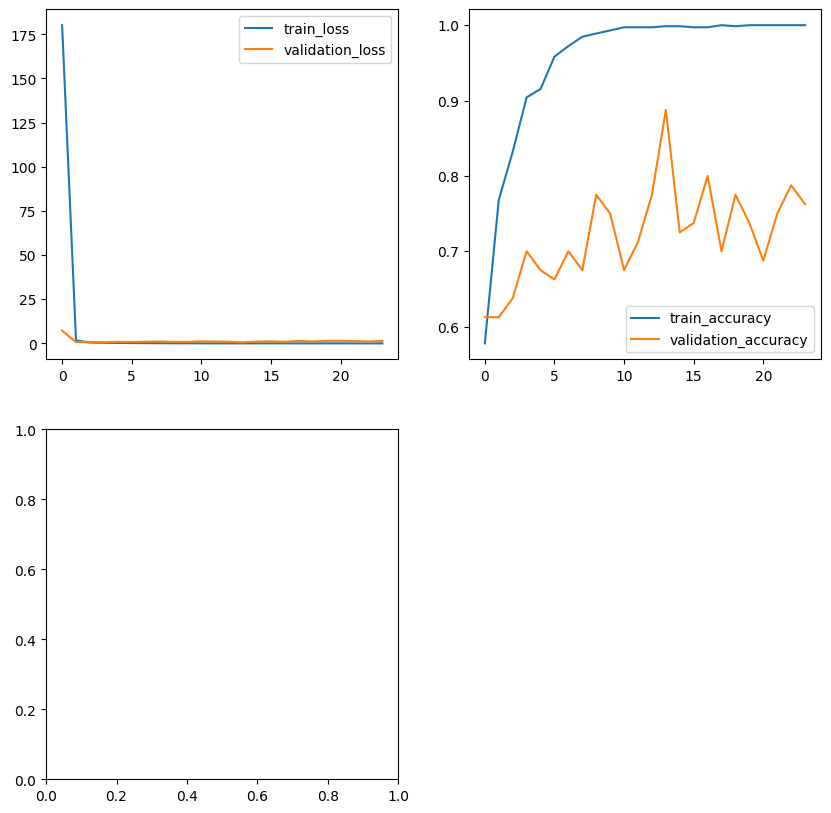

In [25]:
performance_dict = history.history
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['acc'])
plt.plot(performance_dict['val_acc'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_x, test_y)

plt.subplot(2,2,4)
plt.scatter(test_x, test_y)
plt.scatter(test_x, pred_y)

plt.show()

# Custom CNN Model

In [5]:
def create_CNN_model():

    inputs = layers.Input(shape=(224, 224, 3))

    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.AveragePooling2D()(x)

    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.AveragePooling2D()(x)

    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.AveragePooling2D()(x)

    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.AveragePooling2D()(x)

    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.AveragePooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(4096)(x)
    x = layers.Dense(4096)(x)

    outputs = layers.Dense(2, activation='softmax')(x)

    custom_vgg16 = Model(inputs, outputs, name = 'Custom_CNN')

    return custom_vgg16

In [6]:
custom_cnn_model = create_CNN_model()
custom_cnn_model.summary()

Model: "Custom_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 average_pooling2d (Average  (None, 112, 112, 64)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                        

In [28]:
model_path = '/content/drive/MyDrive/Data Set/Saved Model/Custom CNN'
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
custom_cnn_model.compile(optimizer = opt, loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='acc')])
history = custom_cnn_model.fit(train_x, train_y, batch_size = 32, epochs = 100, validation_split = 0.1, shuffle = True, callbacks = my_callback)

Epoch 1/100
23/23 [==============================] - 35s 736ms/step - loss: 0.6874 - acc: 0.5861 - val_loss: 0.7411 - val_acc: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 10s 423ms/step - loss: 0.6829 - acc: 0.5861 - val_loss: 0.9098 - val_acc: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 10s 436ms/step - loss: 0.6787 - acc: 0.5861 - val_loss: 0.8113 - val_acc: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 10s 424ms/step - loss: 0.6794 - acc: 0.5861 - val_loss: 0.8745 - val_acc: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 10s 428ms/step - loss: 0.6771 - acc: 0.5778 - val_loss: 0.7745 - val_acc: 0.0375
Epoch 6/100
23/23 [==============================] - 14s 632ms/step - loss: 0.6731 - acc: 0.5958 - val_loss: 0.5926 - val_acc: 0.9125
Epoch 7/100
23/23 [==============================] - 10s 431ms/step - loss: 0.6611 - acc: 0.6181 - val_loss: 0.8338 - val_acc: 0.0000e+00
Epoch 8/100
23/23 [=======================

In [29]:
custom_cnn_model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 91ms/step - loss: 0.9748 - acc: 0.7465


[0.9747682809829712, 0.7464788556098938]

ValueError: x and y must be the same size

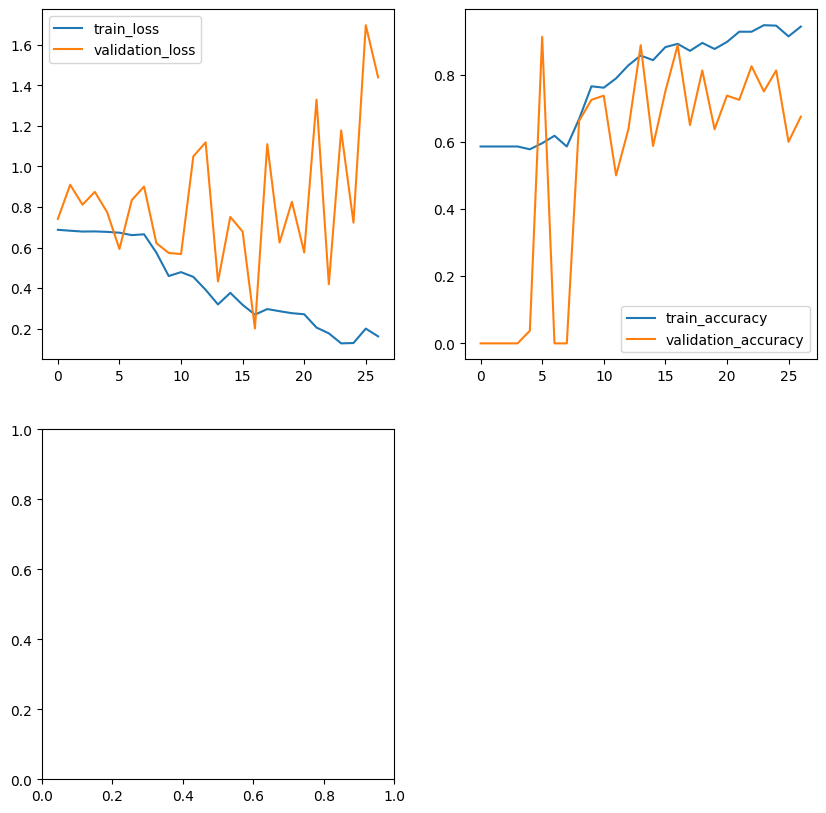

In [31]:
performance_dict = history.history
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['acc'])
plt.plot(performance_dict['val_acc'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_x, test_y)

plt.subplot(2,2,4)
plt.scatter(test_x, test_y)
plt.scatter(test_x, pred_y)

plt.show()

In [4]:
def create_DNN_model():

    inputs = layers.Input(shape=(224, 224, 3))

    x = layers.MaxPooling2D()(inputs)

    x = layers.Dense(4096)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(4096)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(2048)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(2048)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(1024)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(1024)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dense(512)(x)
    x = layers.Flatten()(x)

    outputs = layers.Dense(2, activation='softmax')(x)

    dnn_model = Model(inputs, outputs, name = 'Custom_DNN')

    return dnn_model

In [5]:
dnn_model = create_DNN_model()
#dnn_model.summary()

In [11]:
model_path = '/content/drive/MyDrive/Data Set/Saved Model/Custom DNN'
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
dnn_model.compile(optimizer = opt, loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='acc')])
history = dnn_model.fit(train_x, train_y, batch_size = 16, epochs = 100, validation_split = 0.1, shuffle = True, callbacks = my_callback)

Epoch 1/100
45/45 [==============================] - 96s 2s/step - loss: 11.3371 - acc: 0.6042 - val_loss: 6.7980 - val_acc: 0.2625
Epoch 2/100
45/45 [==============================] - 92s 2s/step - loss: 4.1246 - acc: 0.6264 - val_loss: 13.0181 - val_acc: 0.4125
Epoch 3/100
45/45 [==============================] - 93s 2s/step - loss: 3.1071 - acc: 0.6611 - val_loss: 8.3776 - val_acc: 0.4125
Epoch 4/100
45/45 [==============================] - 95s 2s/step - loss: 2.8776 - acc: 0.6486 - val_loss: 9.1209 - val_acc: 0.3500
Epoch 5/100
45/45 [==============================] - 99s 2s/step - loss: 2.7511 - acc: 0.6389 - val_loss: 4.3894 - val_acc: 0.6375
Epoch 6/100
45/45 [==============================] - 101s 2s/step - loss: 2.2866 - acc: 0.6556 - val_loss: 3.5938 - val_acc: 0.6375
Epoch 7/100
45/45 [==============================] - 94s 2s/step - loss: 2.0081 - acc: 0.6375 - val_loss: 9.2314 - val_acc: 0.3000
Epoch 8/100
45/45 [==============================] - 95s 2s/step - loss: 1.7717 

In [13]:
dnn_model.evaluate(test_x, test_y)

ResourceExhaustedError: Graph execution error:

Detected at node Custom_DNN/dense/BiasAdd-0-TransposeNHWCToNCHW-LayoutOptimizer defined at (most recent call last):
<stack traces unavailable>
OOM when allocating tensor with shape[32,4096,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node Custom_DNN/dense/BiasAdd-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_21948]

ValueError: x and y must be the same size

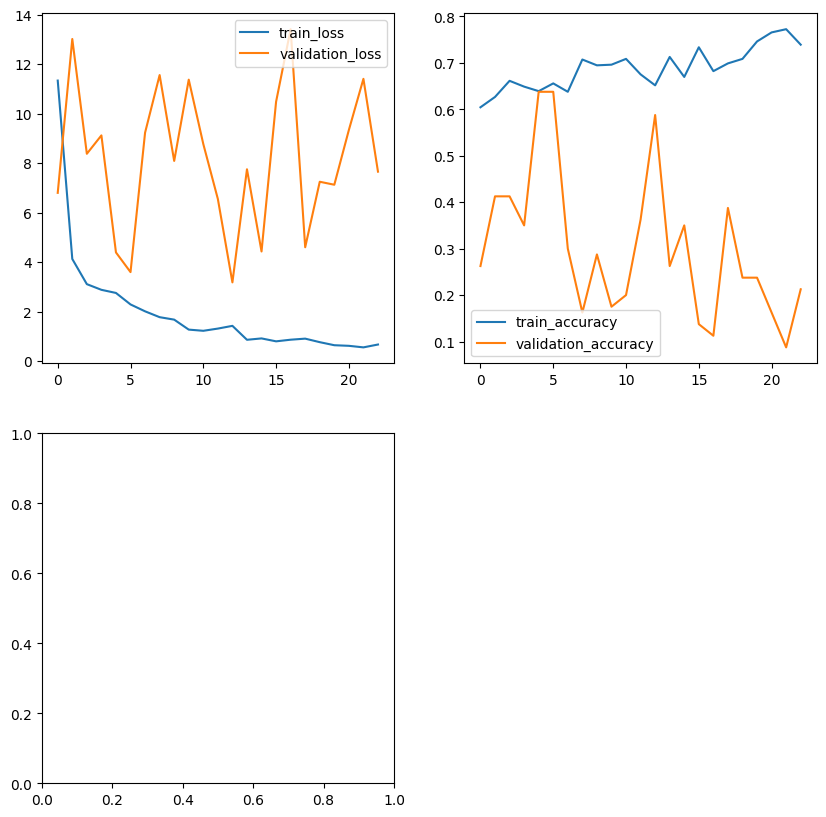

In [16]:
performance_dict = history.history
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['acc'])
plt.plot(performance_dict['val_acc'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_x, test_y)

plt.subplot(2,2,4)
plt.scatter(test_x, test_y)
plt.scatter(test_x, pred_y)

plt.show()